これはjupyter notebook( https://jupyter.org/ )です  

networkxについてはここ  
https://networkx.github.io/documentation/networkx-2.0/index.html

## 基本的なネットワークモデル

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

### Barabasi Albert model 

In [29]:
# BA model 
G=nx.generators.random_graphs.barabasi_albert_graph(100,4) #node_size 100, attach-edges 4

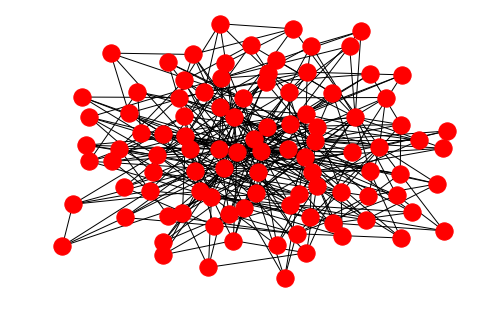

In [30]:
%matplotlib inline
nx.draw_spring(G)

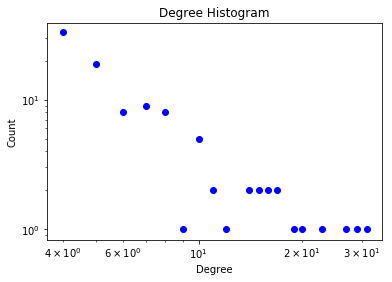

In [31]:
# Sampleコードを引用したもの、次数分布を示す(log-log)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
#plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

上の図よりScale Freeとなっていることが分かる

### Watts-Strogatz model 

平均経路長 12.878787878787879
平均クラスター係数 0.5
確率 0.0


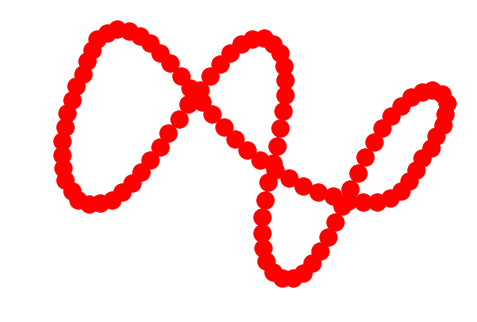

In [32]:
%matplotlib inline
n=100 # node size
k=4 # each node connects k nearest neigbors

p=0.0 
G=nx.connected_watts_strogatz_graph(n,k,p) # WS modelを生成
av_c=nx.algorithms.cluster.average_clustering(G) #平均クラスター係数を計算
av_l=nx.algorithms.average_shortest_path_length(G) #平均経路長を計算
print("平均経路長",av_l)
print("平均クラスター係数",av_c)
print("確率",p)

nx.draw_spring(G)

平均経路長 3.5862626262626263
平均クラスター係数 0.1174761904761904
確率 0.5


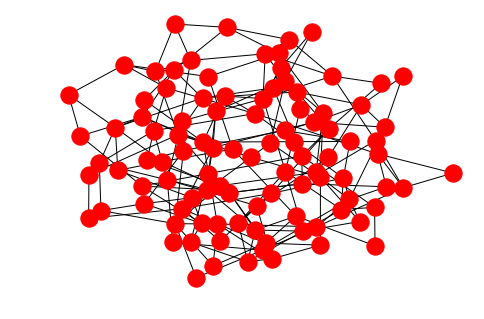

In [33]:
# P値を変更することによるグラフ構造の変化
p=0.5
G=nx.connected_watts_strogatz_graph(n,k,p)
av_c=nx.algorithms.cluster.average_clustering(G)
av_l=nx.algorithms.average_shortest_path_length(G)
print("平均経路長",av_l)
print("平均クラスター係数",av_c)
print("確率",p)

nx.draw_spring(G)

In [34]:

# n,k,pの Watts-Strogatz modelを作って平均クラスター係数と平均経路張を出力する関数
def WS_CL(n,k,p):
    G=nx.connected_watts_strogatz_graph(n,k,p)
    av_c=nx.algorithms.cluster.average_clustering(G)
    av_l=nx.algorithms.average_shortest_path_length(G)
    return av_c,av_l

# Pを適当な間隔で変更し、結果を配列にいれる
def make_WS_CL(n,k):
    clust=np.array([])
    leng=np.array([])
    prob=np.array([])
    p=0.0
    while(p<=1):
        C,L=WS_CL(n,k,p)
        if(p==0):
            C0=C
            L0=L
            p=0.00001
            #print(0,L0,C0)
        else:
            # 配列に入れる
            clust=np.append(clust,C/C0)
            leng=np.append(leng,L/L0)
            prob=np.append(prob,p)
            # pを適当な幅で更新
            if(p<0.0001):
                p+=0.00001
            elif(p<0.001):
                p=p+0.0001
            elif(p<0.01):
                p=p+0.001
            elif(p<0.1):
                p=p+0.01
            else:
                p+=0.1
            #
    return prob,clust,leng

# loop回平均を行う
loop=10
n=100
k=10
for j in range(loop):
    a,b,c=make_WS_CL(n,k)
    if(j==0):
        P=a.copy()
        C=b.copy()
        L=c.copy()
    else:
        for i in range(len(a)):
            P[i]+=a[i]
            C[i]+=b[i]
            L[i]+=c[i]
for i in range(len(P)):
    P[i]/=loop
    C[i]/=loop
    L[i]/=loop


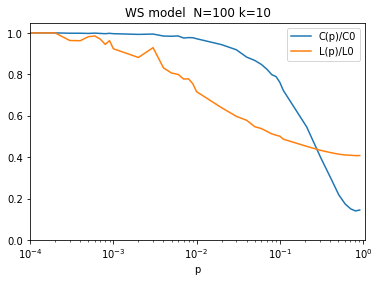

In [35]:
# C(p)/C(0)とL(p)/L(0)を図示

plt.title("WS model  N="+str(n)+" k="+str(k))
plt.xlabel("p")
plt.ylim([0,1.05])
plt.xlim([10**-4,1.05])
plt.xscale('log')
plt.plot(P,C,label="C(p)/C0")
plt.plot(P,L,label="L(p)/L0")
plt.legend()
plt.show()